#Quiz3
#Cleaning "Messy" Data

##Introduction
The original data set is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical compostion of the wines. 

I will explain and present a EDA work from analysis regarding the integrity and usability of the data. And then describe and show the the data integrity and usability issues. Also, I will explain and present my ost data prep EDA analysis. 

**Goal**: explore and “clean” a data set that suffers from a variety of data integrity + usability issues for purposes of using it within a machine learning algorithm.



##Exploratory Data Analysis

**Attribute Information:**

1. Index:  This is a unique ID for each wine in the dataset.

2. Target: This represents the response variable. (indicates # of case of wine sold)

3. Fixed Acidity: Fixed Acidity of the wine(g/L).
The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.
Their respective levels found in wine can vary greatly but in general one would expect to see according to this [link text](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity):

* 1 to 4 g/L tartaric acid
* 0 to 8 g/L malic acid
* 0 to 0.5 g/L citric acid
* 0.5 to 2 g/L succinic acid
* 1.5 to 14.5 g/L when added up

4. Volatile Acidity: Volatile acid content of the wine (g/L).
The primary volatile acid in wine is acetic acid, which is also the primary acid associated with the smell and taste of vinegar.
Volatile acidity concentration is regulated by the federal Tax and Trade Bureau, the maximum volatile acidity according to [this link](https://extension.psu.edu/volatile-acidity-in-wine#:~:text=Volatile%20acidity%20) is:

* 1.4 g/L for red wine
* 1.2 g/L for white wine

5. Citric Acid: Citric acid content of the wine(g/L).  A weak organic acid that occurs naturally in citrus fruits. Part of the acids that compile Fixed Acidity in wine.

6. Residual Sugar - Residual sugar content of the wine (g/L). According to [this link](http://www.moundtop.com/pdf/Winemaking-ResidualSugar.pdf),the Residual Sugar value in wine can vary from 1-2g/L up to 100-200g/L depending on the type of wine.

7. Chlorides : Chloride content of the wine. According to [this link](https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?lang=en#:~:text=Wine%20contains%20from%202%20to,2003%3B%20Maltman%2C%202013), chlorides are a major contributor to saltiness, and wine contains from 2 to 4 g/L of salts of mineral acids, along with some organic acids, and they have a key role on a potential salty taste of a wine.

8. Free Sulfur Dioxide: Sulfur Dioxide content of the wine (mg/L). The Free Sulfur Dioxide (FSO2) and the pH of a wine determine how much SO2 is available in the active, molecular form to help protect the wine from oxidation and spoilage.

9. Total Sulfur Dioxide: Total sulfur dioxide content of the wine (mg/L). Total Sulfur Dioxide (TSO2) is the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine such as aldehydes, pigments, or sugars. The TSO2 level is also regulated by the U.S. Alcohol and Tobacco Tax and Trade Bureau (TTB).
The maximum allowable concentration for a bottled wine according to [this link](https://www.extension.iastate.edu/wine/total-sulfur-dioxide-why-it-matters-too/) is: 350 ppm (mg/L) of TSO2.

10. Density: Density of the wine (g/mL). We know the density of water is about 1.000 g/mL so we can assume wine density should be around that value. 

11. pH: pH of the wine. According to [this link](https://daily.sevenfifty.com/how-winemakers-analyze-ph-and-its-impact-on-wine/) pH levels in wine wine are generally between 3 and 4, with some wines reaching slightly beyond that, to high 2s or low 4s.
For each full point increase in pH, the level of acidity is 10 times more acidic as you go up, so the difference between a pH of 3 and a pH of 4 is very significant.

12. Sulphates: Sulfate content of the wine. According to [this link](http://blog.lastbottlewines.com/education/sulphites/), the level of Sulfites in wine can vary from 0.15g/L up to 0.3g/L depending on the type of wine. (Note: Our research did not yield any results for the spelling sulphates, so we inferred that this variable refers to sulfites.)

13. Alcohol: Alcohol Content. Non-Alcoholic wine exists and Alcohol content in wine ranges wildly from as low as 5.5% to 23% ABV.
[This link](https://winefolly.com/tips/the-lightest-to-the-strongest-wine/) provides more detailed information regarding different types of wine and their Alcohol content.

14. Label Appeal: The description we were given for this field was "subjective marketing score that indicates the appeal of the design of the label on the bottle."

15. Acid Index: Acording to [this link](http://www.bcawa.ca/winemaking/acidph.htm), acid index is calculated by subtracting the pH from the Total Acidity (TA). This is differnt than the desription provided with the dataset ("Measures total acidity of wine via a weighted average").

16. STARS : The description we were given for this field was "wine rating as determined by experts (4 = excellent and 1 = Poor)."


##Initial Exploratory Data Analysis

First, read the data into python using pandas, read csv file.

In [106]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix
import missingno as msno

#loading the data from my own github repo
df=pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv")

#create a second stored value of original data as a safety
df_orignal =df

#check the dataset 
print("Observations: {}".format(df.shape[0]))
df

Observations: 12795


INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
0          1       3           3.2            1.160       -0.98   
1          2       3           4.5            0.160       -0.81   
2          4       5           7.1            2.640       -0.88   
3          5       3           5.7            0.385        0.04   
4          6       4           8.0            0.330       -1.26   
...      ...     ...           ...              ...         ...   
12790  16120       0           5.0           -0.790        2.01   
12791  16123       5           8.9            0.470        0.29   
12792  16127       4           6.0            0.170       -1.10   
12793  16128       3           7.7            0.320        0.12   
12794  16129       4           5.2           -0.040       -0.81   

       ResidualSugar  Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  \
0               54.2     -0.567                NaN               268.0   
1               26.1     -0.425               15.0              -327.0   
2               14.8      0.037              214.0               142.0   
3               18.8     -0.425               22.0               115.0   
4                9.4        NaN             -167.0               108.0   
...              ...        ...                ...                 ...   
12790            5.0      0.043               17.0               101.0   
12791           84.9      0.259               54.0                 NaN   
12792           37.0      0.078               25.0               108.0   
12793            NaN      0.029               26.0               274.0   
12794           52.7        NaN             -106.0               242.0   

       Density    pH  Sulphates  Alcohol  LabelAppeal  AcidIndex  STARS  
0      0.99280  3.33      -0.59      9.9            0          8    2.0  
1      1.02792  3.38       0.70      NaN           -1          7    3.0  
2      0.99518  3.12       0.48     22.0           -1          8    3.0  
3      0.99640  2.24       1.83      6.2           -1          6    1.0  
4      0.99457  3.12       1.77     13.7            0          9    2.0  
...        ...   ...        ...      ...          ...        ...    ...  
12790  1.01077  3.39       0.57      4.9            1          5    NaN  
12791  0.99518  4.46      -1.20      NaN           -1          8    2.0  
12792  0.99076  3.25        NaN     12.3            0          6    2.0  
12793  0.99060  3.97       0.62     11.0           -1          6    2.0  
12794  0.99454  3.94      -0.12      9.9            0          7    2.0  

[12795 rows x 16 columns]

In [107]:
#checking dataset shape
df.shape

(12795, 16)

Analyzing each attribute individually

In [108]:
# INDEX
# chequing if there are duplicates, and there aren't
df[df.INDEX.duplicated()]

Empty DataFrame
Columns: [INDEX, TARGET, FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Density, pH, Sulphates, Alcohol, LabelAppeal, AcidIndex, STARS]
Index: []

Delete useless data and rename the variable more meaningfully

In [109]:
#Before beginning any analysis, we drop the first Index column as it is useless in a dataframe.
df.drop('INDEX',1,inplace = True)

#rename the variable in the dataset with meaningful names
df = df.rename(columns = {'TARGET': 'Sold', 'STARS': 'Rating'})
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Sold  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0         3           3.2            1.160       -0.98           54.2   
1         3           4.5            0.160       -0.81           26.1   
2         5           7.1            2.640       -0.88           14.8   
3         3           5.7            0.385        0.04           18.8   
4         4           8.0            0.330       -1.26            9.4   
...     ...           ...              ...         ...            ...   
12790     0           5.0           -0.790        2.01            5.0   
12791     5           8.9            0.470        0.29           84.9   
12792     4           6.0            0.170       -1.10           37.0   
12793     3           7.7            0.320        0.12            NaN   
12794     4           5.2           -0.040       -0.81           52.7   

       Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  \
0         -0.567                NaN               268.0  0.99280  3.33   
1         -0.425               15.0              -327.0  1.02792  3.38   
2          0.037              214.0               142.0  0.99518  3.12   
3         -0.425               22.0               115.0  0.99640  2.24   
4            NaN             -167.0               108.0  0.99457  3.12   
...          ...                ...                 ...      ...   ...   
12790      0.043               17.0               101.0  1.01077  3.39   
12791      0.259               54.0                 NaN  0.99518  4.46   
12792      0.078               25.0               108.0  0.99076  3.25   
12793      0.029               26.0               274.0  0.99060  3.97   
12794        NaN             -106.0               242.0  0.99454  3.94   

       Sulphates  Alcohol  LabelAppeal  AcidIndex  Rating  
0          -0.59      9.9            0          8     2.0  
1           0.70      NaN           -1          7     3.0  
2           0.48     22.0           -1          8     3.0  
3           1.83      6.2           -1          6     1.0  
4           1.77     13.7            0          9     2.0  
...          ...      ...          ...        ...     ...  
12790       0.57      4.9            1          5     NaN  
12791      -1.20      NaN           -1          8     2.0  
12792        NaN     12.3            0          6     2.0  
12793       0.62     11.0           -1          6     2.0  
12794      -0.12      9.9            0          7     2.0  

[12795 rows x 15 columns]

It look unclear data becuase there has negative values. For instance, pH cannot be negative, so negative signs are mistakes. I have to turn everything positive form negative. 

In [110]:
#Count how many are negative to check if it was pre-standardized
#We see that is highly unlikely
a = df.loc[df.CitricAcid <= 0, 'CitricAcid'].count()
b= df.loc[df.Chlorides < 0, 'Chlorides'].count()
c = df.loc[df.FreeSulfurDioxide < 0, 'FreeSulfurDioxide'].count()
print(f'There has {a} negative Citric Acids ')
print(f'There has {b} negative Chlorides ')
print(f'There has {c} negative FreeSulfurDioxides ')

There has 3081 negative Citric Acids 
There has 3197 negative Chlorides 
There has 3036 negative FreeSulfurDioxides 


In [111]:
#turn all values postive
df = abs(df)
df

Sold  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0         3           3.2            1.160        0.98           54.2   
1         3           4.5            0.160        0.81           26.1   
2         5           7.1            2.640        0.88           14.8   
3         3           5.7            0.385        0.04           18.8   
4         4           8.0            0.330        1.26            9.4   
...     ...           ...              ...         ...            ...   
12790     0           5.0            0.790        2.01            5.0   
12791     5           8.9            0.470        0.29           84.9   
12792     4           6.0            0.170        1.10           37.0   
12793     3           7.7            0.320        0.12            NaN   
12794     4           5.2            0.040        0.81           52.7   

       Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  \
0          0.567                NaN               268.0  0.99280  3.33   
1          0.425               15.0               327.0  1.02792  3.38   
2          0.037              214.0               142.0  0.99518  3.12   
3          0.425               22.0               115.0  0.99640  2.24   
4            NaN              167.0               108.0  0.99457  3.12   
...          ...                ...                 ...      ...   ...   
12790      0.043               17.0               101.0  1.01077  3.39   
12791      0.259               54.0                 NaN  0.99518  4.46   
12792      0.078               25.0               108.0  0.99076  3.25   
12793      0.029               26.0               274.0  0.99060  3.97   
12794        NaN              106.0               242.0  0.99454  3.94   

       Sulphates  Alcohol  LabelAppeal  AcidIndex  Rating  
0           0.59      9.9            0          8     2.0  
1           0.70      NaN            1          7     3.0  
2           0.48     22.0            1          8     3.0  
3           1.83      6.2            1          6     1.0  
4           1.77     13.7            0          9     2.0  
...          ...      ...          ...        ...     ...  
12790       0.57      4.9            1          5     NaN  
12791       1.20      NaN            1          8     2.0  
12792        NaN     12.3            0          6     2.0  
12793       0.62     11.0            1          6     2.0  
12794       0.12      9.9            0          7     2.0  

[12795 rows x 15 columns]

All values are postivie

In [112]:
#check to see if there are duplicates
duplicates = sum(df.duplicated())
print(f'There has {duplicates} duplicate')

There has 0 duplicate


In [113]:
#checking column data types, and any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sold                12795 non-null  int64  
 1   FixedAcidity        12795 non-null  float64
 2   VolatileAcidity     12795 non-null  float64
 3   CitricAcid          12795 non-null  float64
 4   ResidualSugar       12179 non-null  float64
 5   Chlorides           12157 non-null  float64
 6   FreeSulfurDioxide   12148 non-null  float64
 7   TotalSulfurDioxide  12113 non-null  float64
 8   Density             12795 non-null  float64
 9   pH                  12400 non-null  float64
 10  Sulphates           11585 non-null  float64
 11  Alcohol             12142 non-null  float64
 12  LabelAppeal         12795 non-null  int64  
 13  AcidIndex           12795 non-null  int64  
 14  Rating              9436 non-null   float64
dtypes: float64(12), int64(3)
memory usage: 1.5 MB


In [114]:
#getting exact number of null values in each column
df.isnull().sum()

Sold                     0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
Rating                3359
dtype: int64

###Check the Missing data

In [115]:
# get percent of missing data
missing = df.isnull().mean() * 100
missing.sort_values(inplace=True,ascending=False)
missing

Rating                26.252442
Sulphates              9.456819
TotalSulfurDioxide     5.330207
Alcohol                5.103556
FreeSulfurDioxide      5.056663
Chlorides              4.986323
ResidualSugar          4.814381
pH                     3.087143
Sold                   0.000000
FixedAcidity           0.000000
VolatileAcidity        0.000000
CitricAcid             0.000000
Density                0.000000
LabelAppeal            0.000000
AcidIndex              0.000000
dtype: float64

There are  columns that contain null values. Rating has hightest number of missing data. It is over 26% of the records. And Sulphates, TotalSulfurDioxide, Alcohol, FreeSulfurDioxide, Chlorides, ResidualSugar, and pH have missing datas too. 

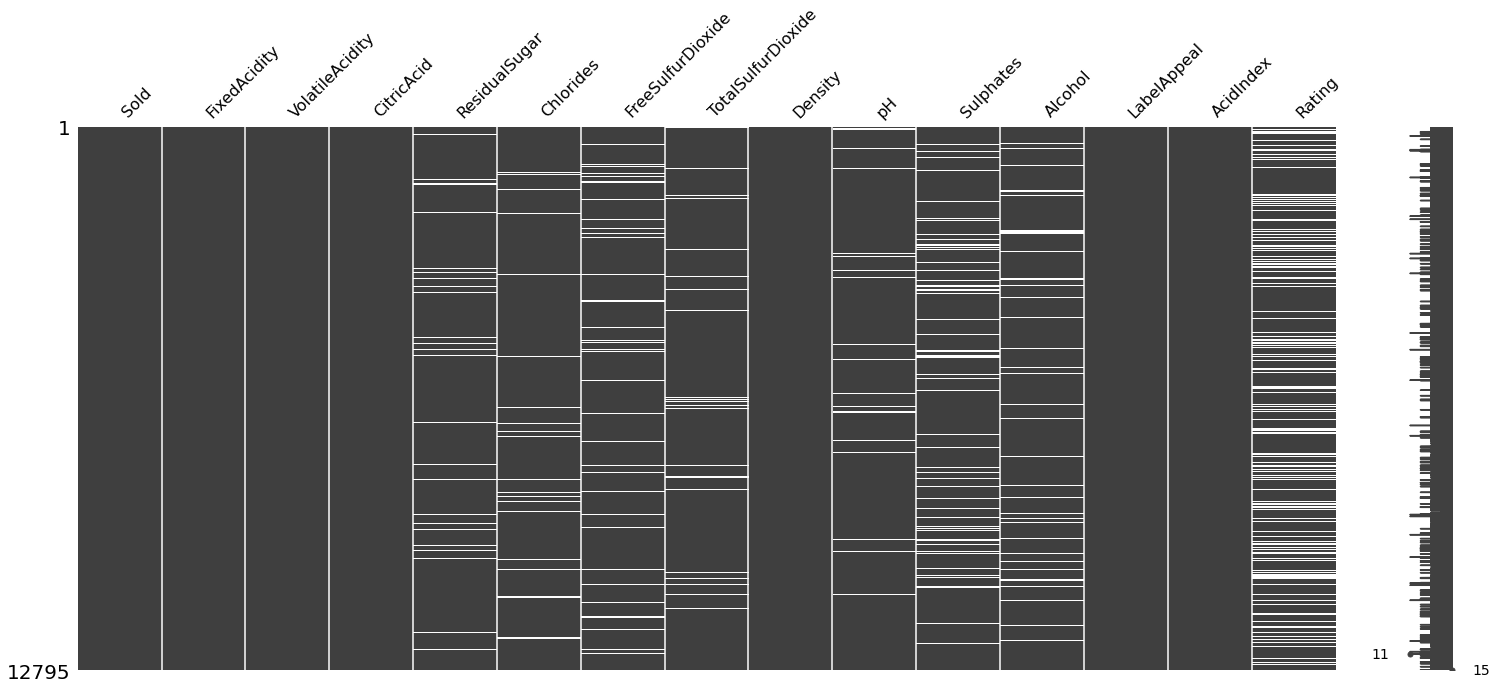

In [116]:
#See a matrix of all the missing data
miss_matrix = msno.matrix(df)

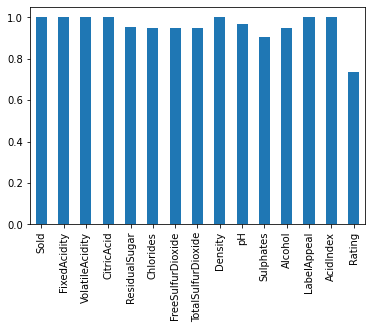

In [117]:
#See a plot of all the missing data
fig, miss_matrix= plt.subplots(figsize=(6, 4))
(1 - df.isnull().mean()).abs().plot.bar(ax=miss_matrix)

These graphs show that Rating has more empty areas of contiguous missing data.

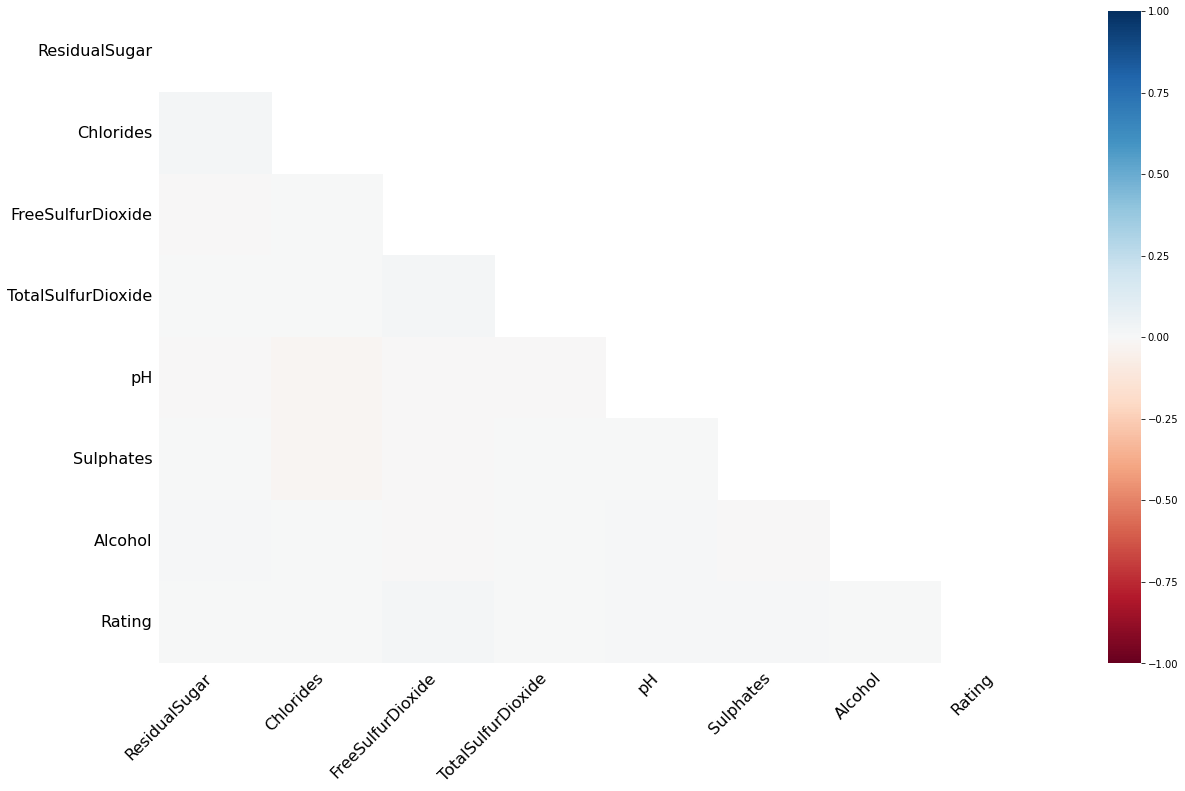

In [118]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
msno.heatmap(df);

There has almost no correlation between missing values.

In [119]:
# show dataset summary statistics
df.describe()

Sold  FixedAcidity  VolatileAcidity    CitricAcid  \
count  12795.000000  12795.000000     12795.000000  12795.000000   
mean       3.029074      8.063251         0.641086      0.686315   
std        1.926368      4.996119         0.555614      0.606005   
min        0.000000      0.000000         0.000000      0.000000   
25%        2.000000      5.600000         0.250000      0.280000   
50%        3.000000      7.000000         0.410000      0.440000   
75%        4.000000      9.800000         0.910000      0.970000   
max        8.000000     34.400000         3.680000      3.860000   

       ResidualSugar     Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  \
count   12179.000000  12157.000000       12148.000000        12113.000000   
mean       23.367809      0.222559         106.679042          204.319120   
std        24.945667      0.234288         108.102694          163.116881   
min         0.000000      0.000000           0.000000            0.000000   
25%         3.600000      0.046000          28.000000          100.000000   
50%        12.900000      0.098000          56.000000          154.000000   
75%        38.700000      0.368000         172.000000          262.000000   
max       141.150000      1.351000         623.000000         1057.000000   

            Density            pH     Sulphates       Alcohol   LabelAppeal  \
count  12795.000000  12400.000000  11585.000000  12142.000000  12795.000000   
mean       0.994203      3.207628      0.846668     10.523778      0.638687   
std        0.026538      0.679687      0.655612      3.629154      0.621425   
min        0.888090      0.480000      0.000000      0.000000      0.000000   
25%        0.987720      2.960000      0.430000      9.000000      0.000000   
50%        0.994490      3.200000      0.590000     10.400000      1.000000   
75%        1.000515      3.470000      1.100000     12.400000      1.000000   
max        1.099240      6.130000      4.240000     26.500000      2.000000   

          AcidIndex       Rating  
count  12795.000000  9436.000000  
mean       7.772724     2.041755  
std        1.323926     0.902540  
min        4.000000     1.000000  
25%        7.000000     1.000000  
50%        8.000000     2.000000  
75%        8.000000     3.000000  
max       17.000000     4.000000

In general dry red wines should have an IA range of about 2 to 3, dry white wines about 2.7 to 3.7 and off-dry white wines about 3.8 to 4.8. The fact that we have an Index of Acidity that has a mean of 7 is not make sense number, unless of course we have many ice-wines which have an acidity level close to 12. Also, the standard deviation is low enough that it would seem to corroborate something very wrong with our AcidIndex column. Since I have no way of determining what is wrong here, I will have to drop the column entirely. Besides this, something most be wrong as FixedAcidity is usually measured quite differently and should not have an average of 8. And, furthermore, FixedAcidity + VolatileAcidity should equal the AcidityIndex, which it does not. While I cannot confirm this is the case (and since I am not a domain expert in the chemical composition of wine), I think dropping this category is best.

In general dry red wines should have an IA range is 2 to 3. Also, dry white wines have 2.7 to 3.7, and off dry white wines is 3.8 to 4.8. Moreover, AcidIndex's mean is 7. That is extremely strange because most of wine's acidity level close to 12. FixedAcidity is measured quite differently, and should not have an average of 8. Thus, I drop this category. 

In [120]:
#drop the AcidIndex
df.drop('AcidIndex',1,inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [121]:
#number of times LabelAppeal is 0
df.loc[df.LabelAppeal == 0, 'LabelAppeal'].count()

5617

[This link](https://www.winespectator.com/articles/what-do-ph-and-ta-numbers-mean-to-a-wine-5035#:~:text=Winemakers%20use%20pH%20as%20a,3.6%20is%20best%20for%20reds): "Winemakers use pH as a way to measure ripeness in relation to acidity. Low pH wines will taste tart and crisp, while higher pH wines are more susceptible to bacterial growth. Most wine pH's fall around 3 or 4; about 3.0 to 3.4 is desirable for white wines, while about 3.3 to 3.6 is best for reds." 



In [122]:
# view correlation matrix for the variables in the dataset
corr_Matrix = df.corr()
corr_Matrix

Sold  FixedAcidity  VolatileAcidity  CitricAcid  \
Sold                1.000000     -0.052984        -0.070195    0.013953   
FixedAcidity       -0.052984      1.000000         0.010195   -0.004378   
VolatileAcidity    -0.070195      0.010195         1.000000   -0.002511   
CitricAcid          0.013953     -0.004378        -0.002511    1.000000   
ResidualSugar       0.003645      0.005040         0.003443   -0.013510   
Chlorides          -0.028463      0.002232         0.008041   -0.004550   
FreeSulfurDioxide   0.024503     -0.003158        -0.010797    0.003845   
TotalSulfurDioxide  0.035253     -0.012379        -0.035379    0.009138   
Density            -0.035518     -0.000057        -0.004208   -0.010854   
pH                 -0.009445     -0.002324         0.016246    0.003293   
Sulphates          -0.035259      0.020987         0.007220    0.017488   
Alcohol             0.063394     -0.009406         0.014157   -0.006218   
LabelAppeal        -0.004544      0.003242         0.003878    0.005860   
Rating              0.558794     -0.018505        -0.030154    0.001627   

                    ResidualSugar  Chlorides  FreeSulfurDioxide  \
Sold                     0.003645  -0.028463           0.024503   
FixedAcidity             0.005040   0.002232          -0.003158   
VolatileAcidity          0.003443   0.008041          -0.010797   
CitricAcid              -0.013510  -0.004550           0.003845   
ResidualSugar            1.000000  -0.002837          -0.007418   
Chlorides               -0.002837   1.000000          -0.004884   
FreeSulfurDioxide       -0.007418  -0.004884           1.000000   
TotalSulfurDioxide       0.014476  -0.015316           0.014710   
Density                 -0.002794   0.016483           0.005979   
pH                       0.001203   0.008080          -0.006287   
Sulphates               -0.007658   0.021366          -0.002096   
Alcohol                 -0.006927  -0.001174          -0.011384   
LabelAppeal             -0.009690  -0.005049           0.000469   
Rating                   0.009897   0.002516           0.002465   

                    TotalSulfurDioxide   Density        pH  Sulphates  \
Sold                          0.035253 -0.035518 -0.009445  -0.035259   
FixedAcidity                 -0.012379 -0.000057 -0.002324   0.020987   
VolatileAcidity              -0.035379 -0.004208  0.016246   0.007220   
CitricAcid                    0.009138 -0.010854  0.003293   0.017488   
ResidualSugar                 0.014476 -0.002794  0.001203  -0.007658   
Chlorides                    -0.015316  0.016483  0.008080   0.021366   
FreeSulfurDioxide             0.014710  0.005979 -0.006287  -0.002096   
TotalSulfurDioxide            1.000000  0.014692  0.010575  -0.010995   
Density                       0.014692  1.000000  0.005768   0.012044   
pH                            0.010575  0.005768  1.000000   0.013386   
Sulphates                    -0.010995  0.012044  0.013386   1.000000   
Alcohol                      -0.033102 -0.007828 -0.009365   0.000251   
LabelAppeal                   0.007771  0.012243  0.001101   0.004947   
Rating                       -0.001291 -0.018284 -0.000488  -0.001227   

                     Alcohol  LabelAppeal    Rating  
Sold                0.063394    -0.004544  0.558794  
FixedAcidity       -0.009406     0.003242 -0.018505  
VolatileAcidity     0.014157     0.003878 -0.030154  
CitricAcid         -0.006218     0.005860  0.001627  
ResidualSugar      -0.006927    -0.009690  0.009897  
Chlorides          -0.001174    -0.005049  0.002516  
FreeSulfurDioxide  -0.011384     0.000469  0.002465  
TotalSulfurDioxide -0.033102     0.007771 -0.001291  
Density            -0.007828     0.012243 -0.018284  
pH                 -0.009365     0.001101 -0.000488  
Sulphates           0.000251     0.004947 -0.001227  
Alcohol             1.000000     0.003627  0.065273  
LabelAppeal         0.003627     1.000000  0.032235  
Rating              0.065273     0.03223

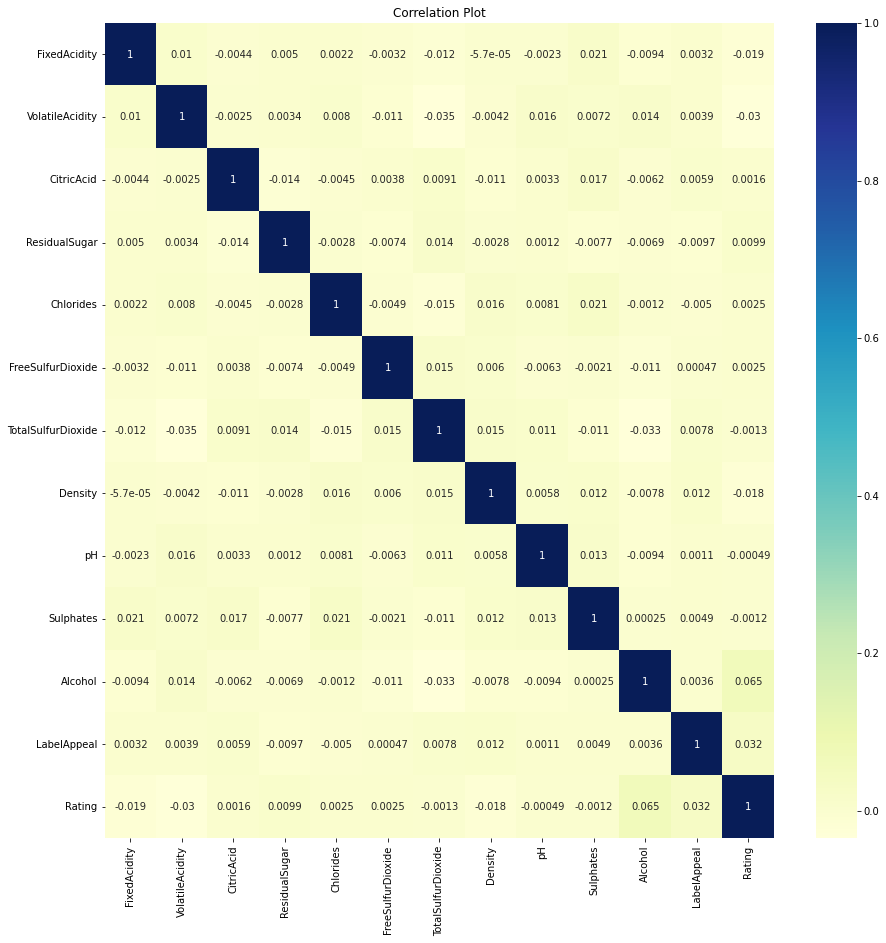

In [123]:
# initial correlation
corr = df.iloc[:,1:].corr()
plt.figure(figsize=(15,15))
plt.title("Correlation Plot")
sns.heatmap(corr,annot=True, cmap="YlGnBu")
plt.show()

### Not The Kitchen Sink


<Figure size 432x288 with 0 Axes>

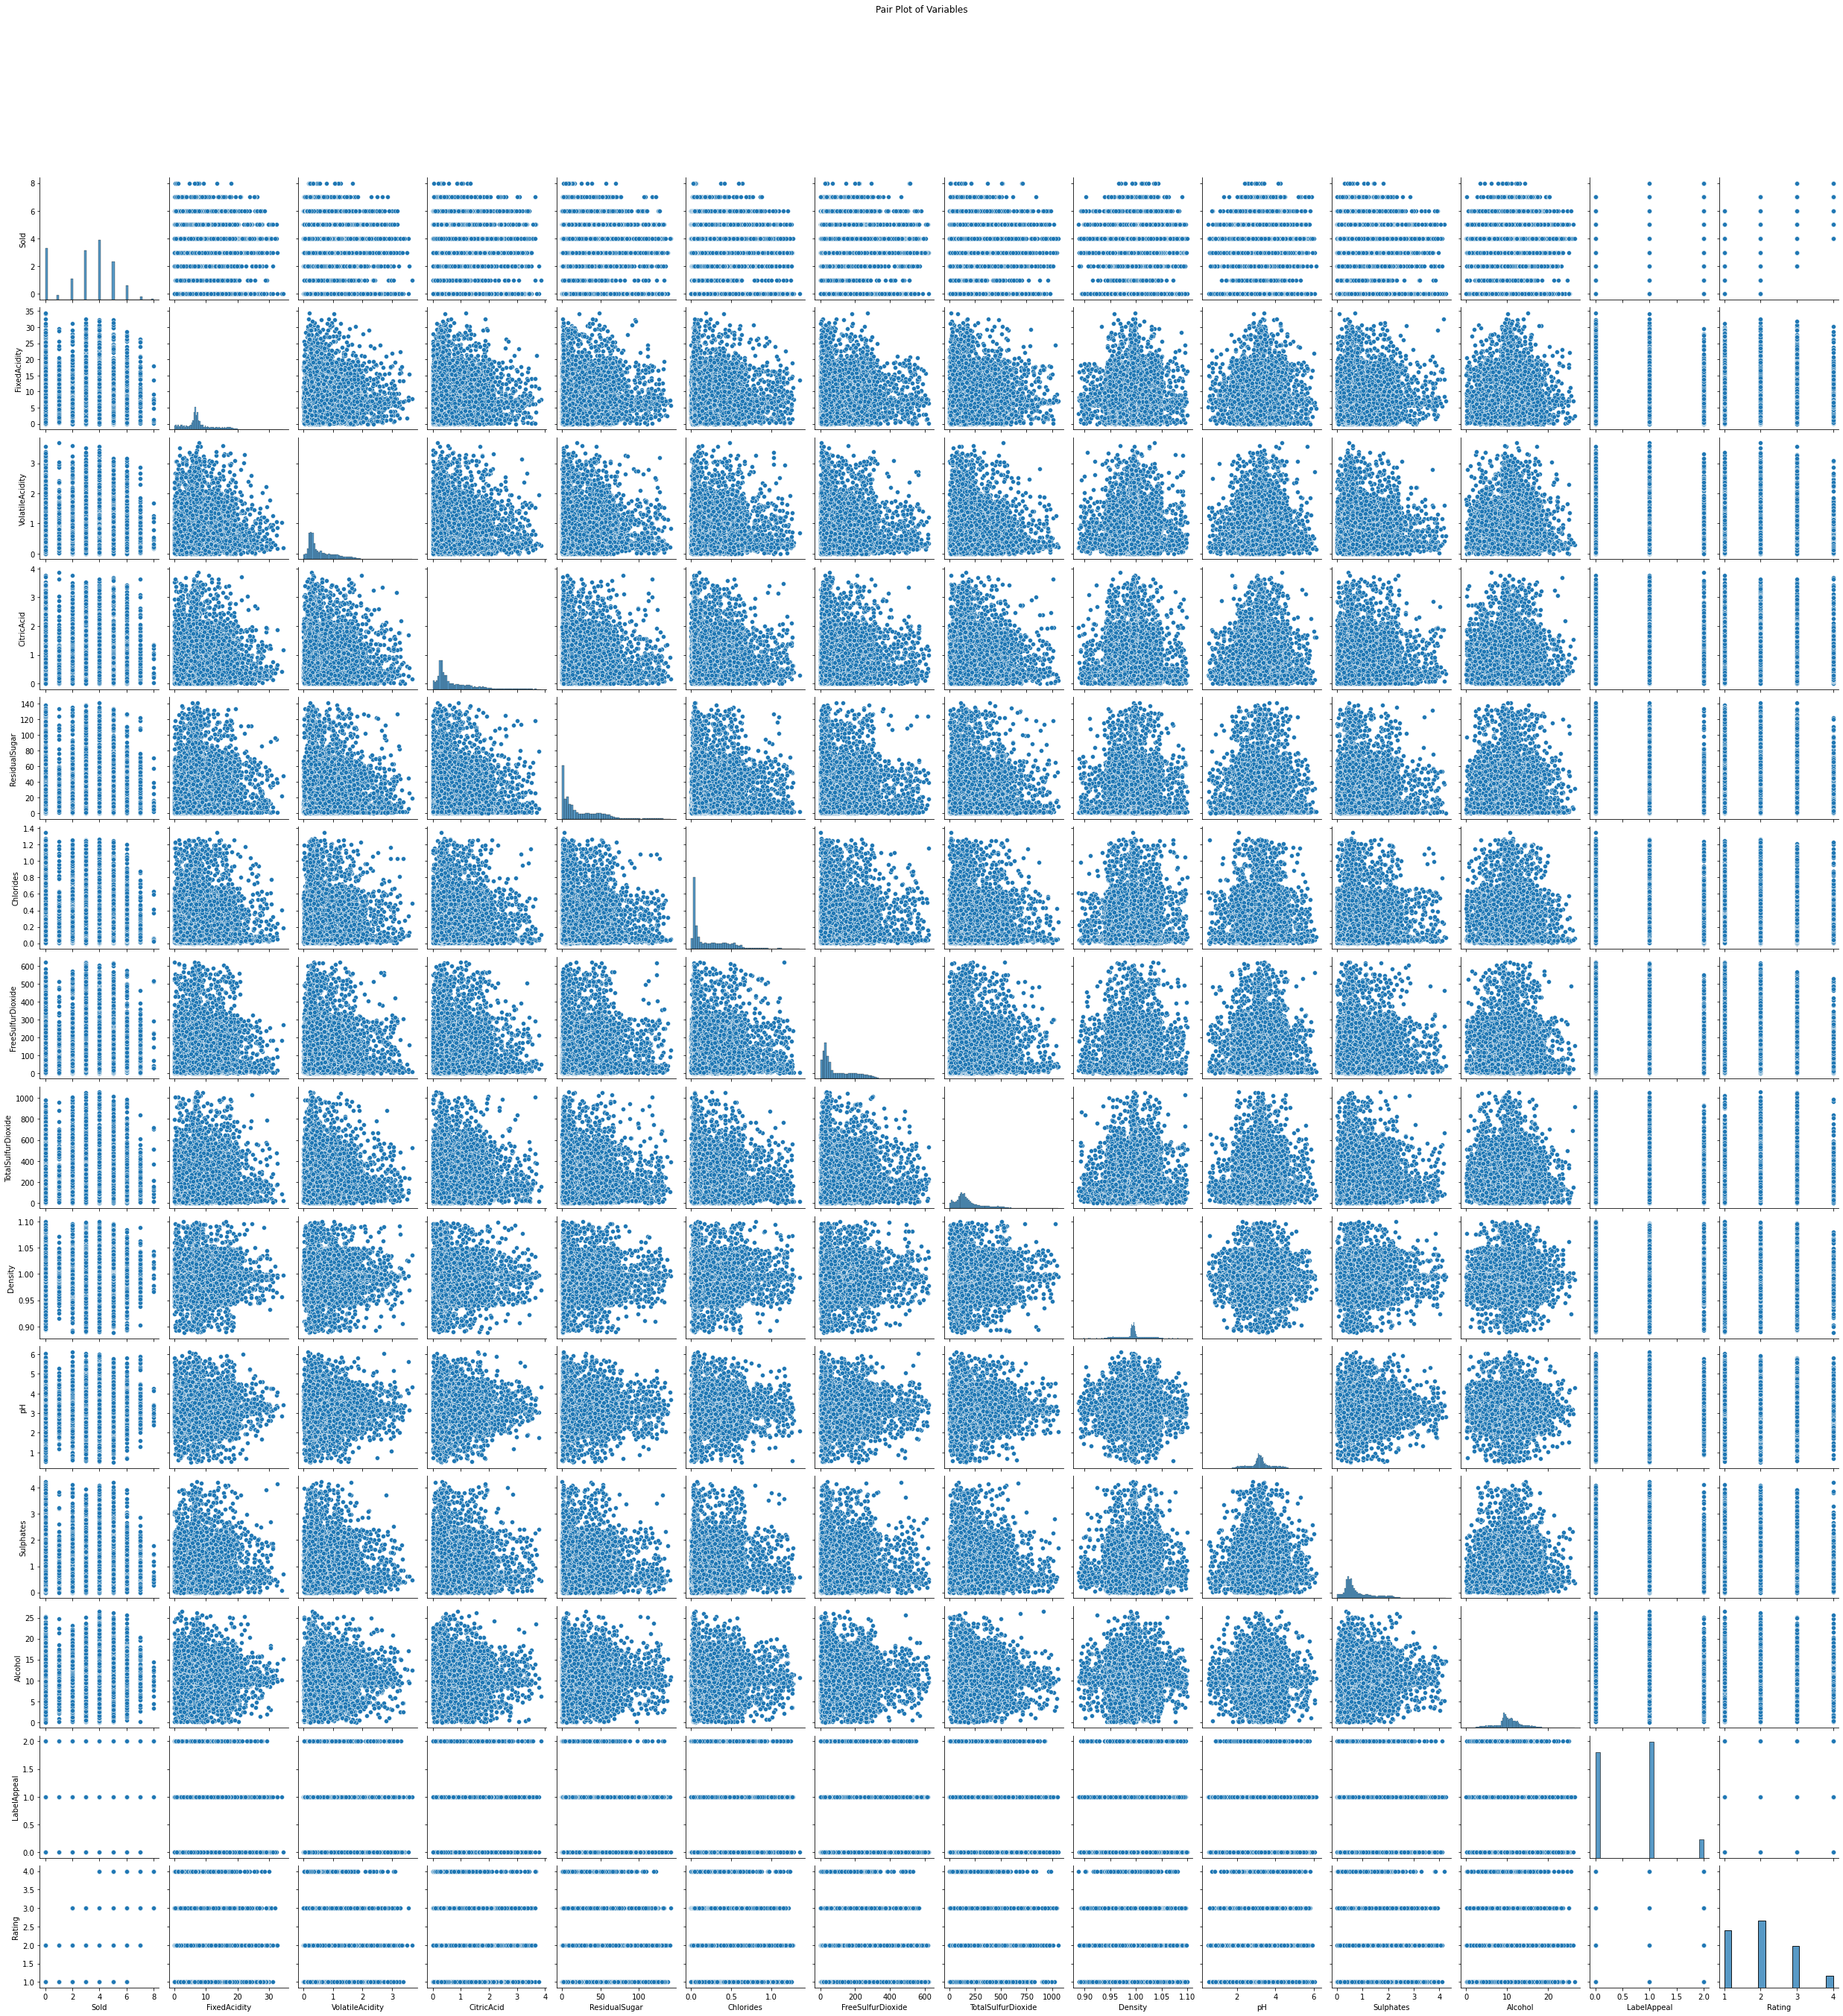

In [124]:
# Create a pairplot to spot any abnormalities we should be aware of in the scatterplot
#define the figure
figure = plt.figure() 

#define what plot to use and what data to look at
x = sns.pairplot(df) 

 # set the title with y= some height>1 so it appears on top
x.fig.suptitle("Pair Plot of Variables", y=1.08)

#display results
plt.show() 

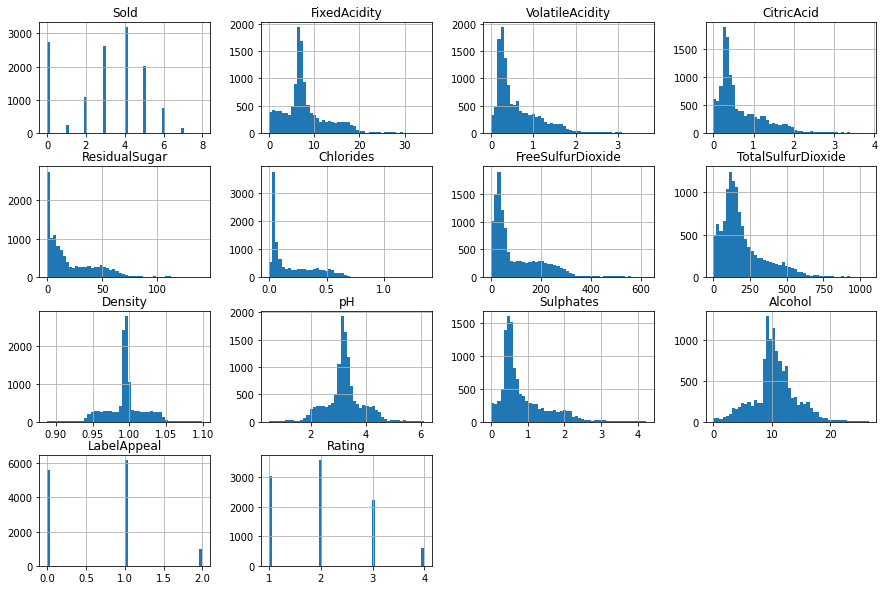

In [126]:
#histograms
df.hist(bins=50, figsize=(15,10))
plt.show()

Data Transformation and Imputing


In [127]:
#We impute the data with the mean
from sklearn.impute import SimpleImputer

num_columns = df.select_dtypes(include="number").columns

#mean
imputed1 = SimpleImputer() 
imputed2 = imputed1.fit_transform(df[num_columns])
imputed2 = pd.DataFrame(imputed2)
imputed2.head()

0    1      2     3     4         5           6      7        8     9   \
0  3.0  3.2  1.160  0.98  54.2  0.567000  106.679042  268.0  0.99280  3.33   
1  3.0  4.5  0.160  0.81  26.1  0.425000   15.000000  327.0  1.02792  3.38   
2  5.0  7.1  2.640  0.88  14.8  0.037000  214.000000  142.0  0.99518  3.12   
3  3.0  5.7  0.385  0.04  18.8  0.425000   22.000000  115.0  0.99640  2.24   
4  4.0  8.0  0.330  1.26   9.4  0.222559  167.000000  108.0  0.99457  3.12   

     10         11   12   13  
0  0.59   9.900000  0.0  2.0  
1  0.70  10.523778  1.0  3.0  
2  0.48  22.000000  1.0  3.0  
3  1.83   6.200000  1.0  1.0  
4  1.77  13.700000  0.0  2.0

## Data Preparation

Changes to the Rating(STAR) column

In [128]:
#showing first 5 records
df.Rating.head()

0    2.0
1    3.0
2    3.0
3    1.0
4    2.0
Name: Rating, dtype: float64

In [129]:
#filling null values with zero
df['Rating'].fillna(0, inplace=True)

#sanity check
df['Rating'].isnull().sum()

0

### Get dummy variables 

In [130]:
#get dummy variables based on Rating
dummies= pd.get_dummies(df['Rating'], prefix='Rating')

#renaming column names
dummies.columns = ['rating_notreviewed', 'rating_poor', 'rating_good','rating_verygood', 'rating_excellent']

#check
dummies.head()

rating_notreviewed  rating_poor  rating_good  rating_verygood  \
0                   0            0            1                0   
1                   0            0            0                1   
2                   0            0            0                1   
3                   0            1            0                0   
4                   0            0            1                0   

   rating_excellent  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [133]:
# merge the dummy variables with the original data (excluding index column)
df_dummy = df.iloc[:,0:].join(dummies)

#drop column Rating
df_dummy.drop(columns=['Rating'], inplace=True)

#sanity check
df_dummy.head()

Sold  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  Chlorides  \
0     3           3.2            1.160        0.98           54.2      0.567   
1     3           4.5            0.160        0.81           26.1      0.425   
2     5           7.1            2.640        0.88           14.8      0.037   
3     3           5.7            0.385        0.04           18.8      0.425   
4     4           8.0            0.330        1.26            9.4        NaN   

   FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  Alcohol  \
0                NaN               268.0  0.99280  3.33       0.59      9.9   
1               15.0               327.0  1.02792  3.38       0.70      NaN   
2              214.0               142.0  0.99518  3.12       0.48     22.0   
3               22.0               115.0  0.99640  2.24       1.83      6.2   
4              167.0               108.0  0.99457  3.12       1.77     13.7   

   LabelAppeal  rating_notreviewed  rating_poor  rating_good  rating_verygood  \
0            0                   0            0            1                0   
1            1                   0            0            0                1   
2            1                   0            0            0                1   
3            1                   0            1            0                0   
4            0                   0            0            1                0   

   rating_excellent  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

There has new columns corresponding to the values of the rating for that particular wine. 

In [134]:
#checking original dataframe
df_dummy.head(1)

Sold  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  Chlorides  \
0     3           3.2             1.16        0.98           54.2      0.567   

   FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  Alcohol  \
0                NaN               268.0   0.9928  3.33       0.59      9.9   

   LabelAppeal  rating_notreviewed  rating_poor  rating_good  rating_verygood  \
0            0                   0            0            1                0   

   rating_excellent  
0                 0

In [135]:
#get absolute values
df_absolute = df_dummy.abs()

#sanity check
df_absolute.head(1)

Sold  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  Chlorides  \
0     3           3.2             1.16        0.98           54.2      0.567   

   FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  Alcohol  \
0                NaN               268.0   0.9928  3.33       0.59      9.9   

   LabelAppeal  rating_notreviewed  rating_poor  rating_good  rating_verygood  \
0            0                   0            0            1                0   

   rating_excellent  
0                 0

In [141]:
#drop old columns
columns=['Alcohol', 'Chlorides', 'CitricAcid', 
         'FixedAcidity','FreeSulfurDioxide', 
         'ResidualSugar', 'Sulphates',
        'TotalSulfurDioxide', 'VolatileAcidity']

df_dummy.drop(columns=columns, inplace=True)

In [142]:
#append absolute values
df_dummy = df_dummy.join(df_absolute[columns])

#sanity check
df_dummy.head()

Sold  Density    pH  LabelAppeal  rating_notreviewed  rating_poor  \
0     3  0.99280  3.33            0                   0            0   
1     3  1.02792  3.38            1                   0            0   
2     5  0.99518  3.12            1                   0            0   
3     3  0.99640  2.24            1                   0            1   
4     4  0.99457  3.12            0                   0            0   

   rating_good  rating_verygood  rating_excellent  Alcohol  Chlorides  \
0            1                0                 0      9.9      0.567   
1            0                1                 0      NaN      0.425   
2            0                1                 0     22.0      0.037   
3            0                0                 0      6.2      0.425   
4            1                0                 0     13.7        NaN   

   CitricAcid  FixedAcidity  FreeSulfurDioxide  ResidualSugar  Sulphates  \
0        0.98           3.2                NaN           54.2       0.59   
1        0.81           4.5               15.0           26.1       0.70   
2        0.88           7.1              214.0           14.8       0.48   
3        0.04           5.7               22.0           18.8       1.83   
4        1.26           8.0              167.0            9.4       1.77   

   TotalSulfurDioxide  VolatileAcidity  
0               268.0            1.160  
1               327.0            0.160  
2               142.0            2.640  
3               115.0            0.385  
4               108.0            0.330

In [143]:
#chequing that there are no negative values, and there aren't
negatives=df_dummy.iloc[:,1:].where(df_dummy.iloc[:,0:]<0).count()
negatives

Density               0
pH                    0
LabelAppeal           0
rating_notreviewed    0
rating_poor           0
rating_good           0
rating_verygood       0
rating_excellent      0
Alcohol               0
Chlorides             0
CitricAcid            0
FixedAcidity          0
FreeSulfurDioxide     0
ResidualSugar         0
Sulphates             0
TotalSulfurDioxide    0
VolatileAcidity       0
dtype: int64

There are still have postivie values in the respective columns

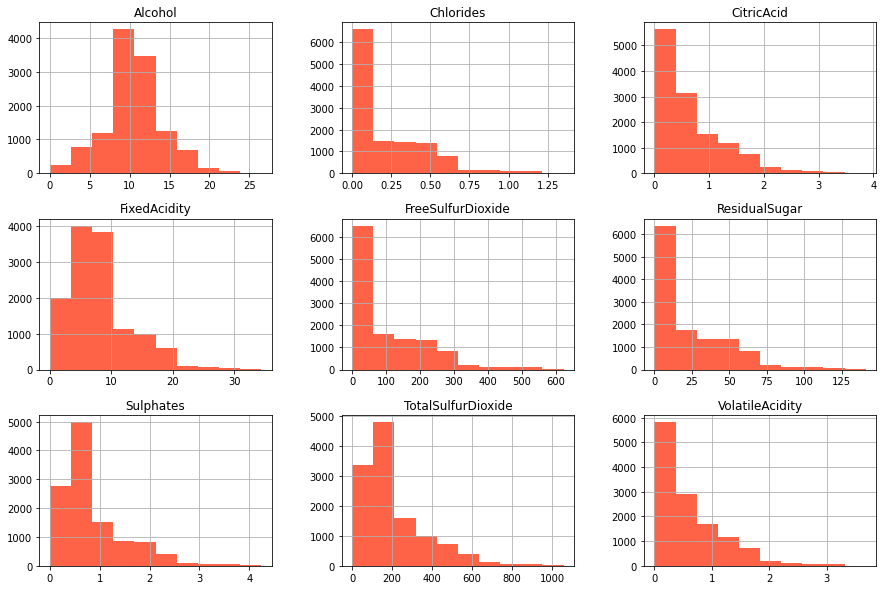

In [144]:
#after applying absolute values
df_dummy[columns].hist(figsize=(15,10), color='tomato');

After applying the absolute values we can see the severe right skew of the distribution for all variables but Alcohol.

### Outliers

In [145]:
#Alchol
# find all wine rows that have Alcohol values whose values are > 
# 2.5 standard deviations from the mean of data in that column
Alcohol_outliers = df_dummy[np.abs(df_dummy['Alcohol'] - df_dummy['Alcohol'].mean() ) > (2.5 * df_dummy['Alcohol'].std() )]
print("Alchol min: " , Alcohol_outliers.Alcohol.min())
print("Alchol max: " ,Alcohol_outliers.Alcohol.max())
print("Alchol shape: " ,Alcohol_outliers.shape[0])

Alcohol_outliers = df_dummy[np.abs(df_dummy['Alcohol']==0)]
print(Alcohol_outliers.shape[0], "observations") 

Alchol min:  0.0
Alchol max:  26.5
Alchol shape:  269
2 observations


In [146]:
#Chlorides
# find all wine rows that have Chlorides values whose values are > 
# 2.5 standard deviations from the mean of data in that column
Chlorides_outliers = df_dummy[np.abs(df_dummy['Chlorides'] - df_dummy['Chlorides'].mean() ) > (2.5 * df_dummy['Chlorides'].std() )]
print("Chlorides min: " ,Chlorides_outliers.Chlorides.min())
print("Chlorides max: " ,Chlorides_outliers.Chlorides.max())
print("Chlorides shape: " ,Chlorides_outliers.shape[0])

#getting Chlorides > 1 as outlier
Chlorides_outliers = df_dummy[df_dummy['Chlorides'] > 1]
print(Chlorides_outliers.Chlorides.min())
print(Chlorides_outliers.shape[0])

Chlorides min:  0.809
Chlorides max:  1.351
Chlorides shape:  345
1.001
163


In [147]:
#checking previous shape
print(df_dummy.shape)

# now remove the extreme outliers from the temporary series
df_dummy.drop(Chlorides_outliers.index.values, inplace=True)

#sanity check
print(df_dummy.shape)

(12795, 18)
(12632, 18)


In [148]:
#CitricAcid
# find all wine rows that have CitricAcid values whose values are > 
# 2.5 standard deviations from the mean of data in that column
CitricAcid_outliers = df_dummy[np.abs(df_dummy['CitricAcid'] - df_dummy['CitricAcid'].mean() ) > (2.5 * df_dummy['CitricAcid'].std() )]
print("CitricAcid min: " ,CitricAcid_outliers.CitricAcid.min())
print("CitricAcid shape: " ,CitricAcid_outliers.shape[0])

# now remove the extreme outliers from the temporary series
df_dummy.drop(CitricAcid_outliers.index.values, inplace=True)

#sanity check
df_dummy.shape

CitricAcid min:  2.21
CitricAcid shape:  333


(12299, 18)

In [149]:
#FixedAcidity
# find all wine rows that have FixedAcidity values whose values are > 
# 2.5 standard deviations from the mean of data in that column
FixedAcidity_outliers = df_dummy[np.abs(df_dummy['FixedAcidity'] - df_dummy['FixedAcidity'].mean() ) > (2.5 * df_dummy['FixedAcidity'].std() )]
print("FixedAcidity min: ",FixedAcidity_outliers.FixedAcidity.min())
print("FixedAcidity shape: ",FixedAcidity_outliers.shape[0])

# now remove the extreme outliers from the temporary series
df_dummy.drop(FixedAcidity_outliers.index.values, inplace=True)

#sanity check
df_dummy.shape

FixedAcidity min:  20.6
FixedAcidity shape:  233


(12066, 18)

In [150]:
#FreeSulfureDioxide
# find all wine rows that have FreeSulfurDioxide values whose values are > 
# 2.5 standard deviations from the mean of data in that column
FreeSulfurDioxide_outliers = df_dummy[np.abs(df_dummy['FreeSulfurDioxide'] - df_dummy['FreeSulfurDioxide'].mean() ) > (2.5 * df_dummy['FreeSulfurDioxide'].std() )]
print("FreeSulfureDioxide min: ",FreeSulfurDioxide_outliers.FixedAcidity.min())
print("FreeSulfureDioxide shape: ",FreeSulfurDioxide_outliers.shape[0])

FreeSulfureDioxide min:  0.0
FreeSulfureDioxide shape:  299


In [151]:
#ResidualSugar
# find all wine rows that have ResidualSugar values whose values are > 
# 2.5 standard deviations from the mean of data in that column
ResidualSugar_outliers = df_dummy[np.abs(df_dummy['ResidualSugar'] - df_dummy['ResidualSugar'].mean() ) > (2.5 * df_dummy['ResidualSugar'].std() )]
ResidualSugar_outliers = df_dummy['ResidualSugar']
print("ResidualSugar min: ",ResidualSugar_outliers.min())
print("ResidualSugar max: ",ResidualSugar_outliers.max())

ResidualSugar min:  0.0
ResidualSugar max:  141.15


In [152]:
#Sulphates
# find all wine rows that have TotalSulfureDioxide values whose values are > 
# 2.5 standard deviations from the mean of data in that column
Sulphates_outliers = df_dummy[np.abs(df_dummy['Sulphates'] - df_dummy['Sulphates'].mean() ) > (2.5 * df_dummy['Sulphates'].std() )]
print("Sulphates min: ",Sulphates_outliers.Sulphates.min())
print("Sulphates shape: ",Sulphates_outliers.shape[0])

# now remove the extreme outliers from the temporary series
df_dummy.drop(Sulphates_outliers.index.values, inplace=True)

#sanity check
df_dummy.shape

Sulphates min:  2.48
Sulphates shape:  264


(11802, 18)

In [153]:
#TotalSulfurDioxide
# find all wine rows that have TotalSulfureDioxide values whose values are > 
# 2.5 standard deviations from the mean of data in that column
TotalSulfurDioxide_outliers = df_dummy[np.abs(df_dummy['TotalSulfurDioxide'] - df_dummy['TotalSulfurDioxide'].mean() ) > (2.5 * df_dummy['TotalSulfurDioxide'].std() )]
print("TotalSulfurDioxide min: ",TotalSulfurDioxide_outliers.TotalSulfurDioxide.max())
print("TotalSulfurDioxide shape: ",TotalSulfurDioxide_outliers.shape[0])

#reassign the value of the outiler table to exclude the values > 500 
TotalSulfurDioxide_outliers = df_dummy[df_dummy['TotalSulfurDioxide']>500]

# now remove the extreme outliers from the temporary series
df_dummy.drop(TotalSulfurDioxide_outliers.index.values, inplace=True)

#sanity check
df_dummy.shape

TotalSulfurDioxide min:  1057.0
TotalSulfurDioxide shape:  296


(11039, 18)

In [154]:
#VolatileAcidity
# find all wine rows that have VolatileAcidity values whose values are > 
# 2.5 standard deviations from the mean of data in that column
VolatileAcidity_outliers = df_dummy[np.abs(df_dummy['VolatileAcidity'] - df_dummy['VolatileAcidity'].mean() ) > (2.5 * df_dummy['VolatileAcidity'].std() )]
print("VolatileAcidity min: ",VolatileAcidity_outliers.VolatileAcidity.min())
print("VolatileAcidity shape: ",VolatileAcidity_outliers.shape[0])

# now remove the extreme outliers from the temporary series
df_dummy.drop(VolatileAcidity_outliers.index.values, inplace=True)

#sanity check
df_dummy.shape

VolatileAcidity min:  2.04
VolatileAcidity shape:  298


(10741, 18)

In [155]:
#check null values in each column
nullCount=df_dummy[columns].isnull().sum()
nullCount

Alcohol                542
Chlorides              537
CitricAcid               0
FixedAcidity             0
FreeSulfurDioxide      540
ResidualSugar          516
Sulphates             1050
TotalSulfurDioxide     617
VolatileAcidity          0
dtype: int64

There are 6 columns need to fix now.

In [156]:
#checking correlations, adding response variable
columns.append('Sold')
df_dummy.corr()

Sold   Density        pH  LabelAppeal  \
Sold                1.000000 -0.033372 -0.007329     0.000157   
Density            -0.033372  1.000000  0.003974     0.011535   
pH                 -0.007329  0.003974  1.000000     0.001304   
LabelAppeal         0.000157  0.011535  0.001304     1.000000   
rating_notreviewed -0.572119  0.024117  0.009635     0.030756   
rating_poor        -0.128576  0.003708  0.006283     0.001321   
rating_good         0.246095 -0.005789 -0.008065    -0.051099   
rating_verygood     0.359143 -0.020856 -0.013229    -0.009628   
rating_excellent    0.276672 -0.007787  0.008067     0.058345   
Alcohol             0.063091  0.000598 -0.015180     0.004537   
Chlorides          -0.017576  0.023709  0.015769    -0.005641   
CitricAcid          0.021905 -0.015763 -0.012577    -0.003084   
FixedAcidity       -0.055266  0.000213 -0.004596     0.004561   
FreeSulfurDioxide   0.030006  0.006614 -0.015675     0.000893   
ResidualSugar       0.004890  0.000789  0.000603    -0.010945   
Sulphates          -0.035135  0.011297  0.019715     0.004572   
TotalSulfurDioxide  0.035604 -0.005083  0.003905     0.013886   
VolatileAcidity    -0.076862 -0.001188  0.004365    -0.007180   

                    rating_notreviewed  rating_poor  rating_good  \
Sold                         -0.572119    -0.128576     0.246095   
Density                       0.024117     0.003708    -0.005789   
pH                            0.009635     0.006283    -0.008065   
LabelAppeal                   0.030756     0.001321    -0.051099   
rating_notreviewed            1.000000    -0.332234    -0.368922   
rating_poor                  -0.332234     1.000000    -0.349975   
rating_good                  -0.368922    -0.349975     1.000000   
rating_verygood              -0.270301    -0.256419    -0.284735   
rating_excellent             -0.133618    -0.126755    -0.140753   
Alcohol                      -0.031601    -0.016212    -0.009897   
Chlorides                     0.017974    -0.021331     0.014382   
CitricAcid                   -0.027282     0.011673     0.015815   
FixedAcidity                  0.040659     0.012313    -0.029687   
FreeSulfurDioxide            -0.018119    -0.017649     0.032985   
ResidualSugar                -0.007414    -0.003834     0.003721   
Sulphates                     0.024680    -0.013925    -0.004223   
TotalSulfurDioxide           -0.033194     0.004490     0.023773   
VolatileAcidity               0.039058     0.024542    -0.037155   

                    rating_verygood  rating_excellent   Alcohol  Chlorides  \
Sold                       0.359143          0.276672  0.063091  -0.017576   
Density                   -0.020856         -0.007787  0.000598   0.023709   
pH                        -0.013229          0.008067 -0.015180   0.015769   
LabelAppeal               -0.009628          0.058345  0.004537  -0.005641   
rating_notreviewed        -0.270301         -0.133618 -0.031601   0.017974   
rating_poor               -0.256419         -0.126755 -0.016212  -0.021331   
rating_good               -0.284735         -0.140753 -0.009897   0.014382   
rating_verygood            1.000000         -0.103127  0.044365  -0.011306   
rating_excellent          -0.103127          1.000000  0.039367  -0.004297   
Alcohol                    0.044365          0.039367  1.000000  -0.003508   
Chlorides                 -0.011306         -0.004297 -0.003508   1.000000   
CitricAcid                 0.001862         -0.003856 -0.006780  -0.000855   
FixedAcidity              -0.019990         -0.010215 -0.014303  -0.010887   
FreeSulfurDioxide         -0.001470          0.005610 -0.015310   0.001033   
ResidualSugar              0.003479          0.008965 -0.006676  -0.004198   
Sulphates                 -0.000591         -0.012674 -0.007536   0.010522   
TotalSulfurDioxide         0.014110         -0.015846 -0.012643  -0.014077   
VolatileAcidity           -0.016456         -0.021859  0.007409   0.017474   

            

In [157]:
#creating a copy of the df
copy=df_dummy.copy()

#Getting records where at least there is one null value
records_delete=copy.dropna(how='any')
records_delete

Sold  Density    pH  LabelAppeal  rating_notreviewed  rating_poor  \
3         3  0.99640  2.24            1                   0            1   
5         0  0.99940  3.20            0                   1            0   
6         0  0.99572  3.49            0                   1            0   
9         6  0.94724  3.09            0                   0            0   
10        0  0.99340  4.31            1                   0            1   
...     ...      ...   ...          ...                 ...          ...   
12781     0  0.99810  2.00            1                   1            0   
12786     0  0.99524  2.73            1                   1            0   
12788     4  0.99830  2.83            1                   0            0   
12789     4  0.99710  3.45            0                   0            1   
12790     0  1.01077  3.39            1                   1            0   

       rating_good  rating_verygood  rating_excellent  Alcohol  Chlorides  \
3                0                0                 0      6.2      0.425   
5                0                0                 0     15.4      0.556   
6                0                0                 0     10.3      0.060   
9                0                0                 1     12.6      0.277   
10               0                0                 0     13.1      0.022   
...            ...              ...               ...      ...        ...   
12781            0                0                 0      9.9      0.155   
12786            0                0                 0     13.6      0.478   
12788            0                1                 0      9.3      0.633   
12789            0                0                 0      9.5      0.525   
12790            0                0                 0      4.9      0.043   

       CitricAcid  FixedAcidity  FreeSulfurDioxide  ResidualSugar  Sulphates  \
3            0.04           5.7               22.0           18.8       1.83   
5            0.59          11.3               37.0            2.2       1.29   
6            0.40           7.7              287.0           21.5       1.21   
9            0.39           5.5               62.0            1.8       0.75   
10           0.15          17.2              551.0           33.8       0.56   
...           ...           ...                ...            ...        ...   
12781        0.57          11.6                3.0            3.2       0.70   
12786        1.15           6.8              228.0            3.9       0.10   
12788        0.38           8.4              208.0           37.1       0.25   
12789        0.29           4.4               30.0            1.9       0.59   
12790        2.01           5.0               17.0            5.0       0.57   

       TotalSulfurDioxide  VolatileAcidity  
3                   115.0            0.385  
5                    15.0            0.320  
6                   156.0            0.290  
9                   180.0            0.220  
10                   65.0            0.520  
...                   ...              ...  
12781                55.0            1.040  
12786                29.0            0.130  
12788               220.0            0.300  
12789               391.0            0.220  
12790               101.0            0.790  

[7248 rows x 18 columns]

There has many number of rows to be deleted, so I decide to drop this colunms. 

### Filling

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


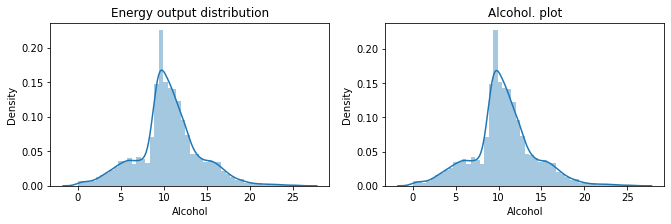

In [158]:
#Alcohol
#filling missing values for Alcohol, strategy backwardsfill
df_dummy.Alcohol.bfill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_dummy["Alcohol"]);
plt.title("Energy output distribution");

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["Alcohol"].notnull()]["Alcohol"]);
plt.title("Alcohol. plot");

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


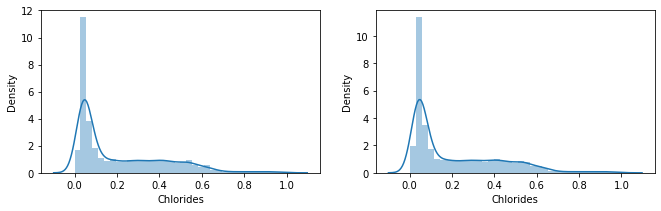

In [159]:
#Chlorides
#filling missing values for Alcohol, strategy backwardsfill
df_dummy.Chlorides.ffill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_dummy["Chlorides"]);

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["Chlorides"].notnull()]["Chlorides"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


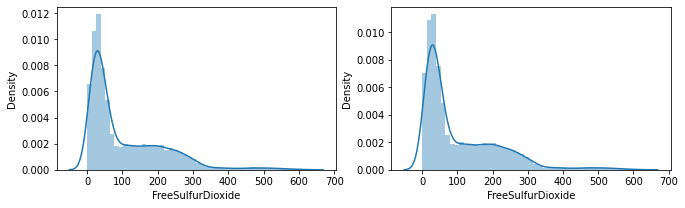

In [160]:
#FreeSulfurDioxide
#filling missing values for Alcohol, strategy backwardsfill
df_dummy.FreeSulfurDioxide.bfill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_dummy["FreeSulfurDioxide"]);

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["FreeSulfurDioxide"].notnull()]["FreeSulfurDioxide"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


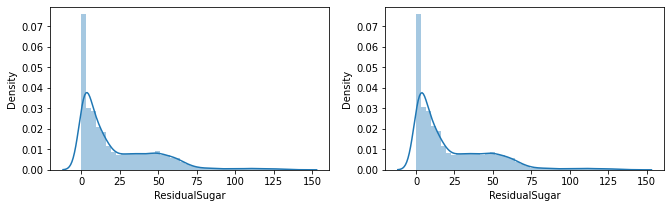

In [161]:
#ResidualSugar
#filling missing values for Alcohol, strategy backwardsfill
df_dummy.ResidualSugar.bfill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_dummy["ResidualSugar"]);

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["ResidualSugar"].notnull()]["ResidualSugar"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


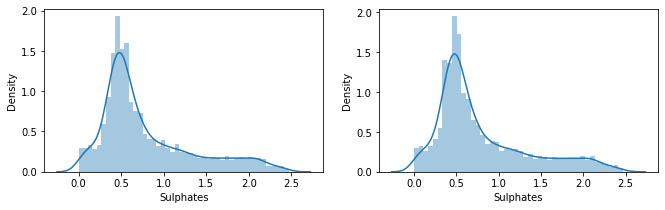

In [162]:
#Sulphates
#filling missing values for Alcohol, strategy backwardsfill
df_dummy.Sulphates.ffill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_dummy["Sulphates"]);

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["Sulphates"].notnull()]["Sulphates"]);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


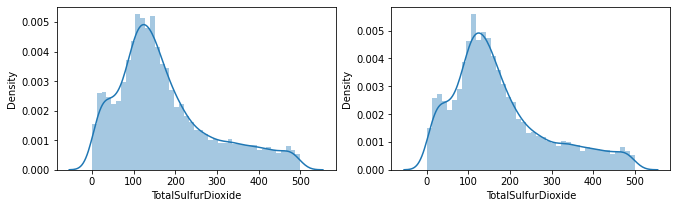

In [163]:
#TotalSulfurDioxide
#filling missing values for Alcohol, strategy backwardsfill
df_dummy.TotalSulfurDioxide.ffill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_dummy["TotalSulfurDioxide"]);

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["TotalSulfurDioxide"].notnull()]["TotalSulfurDioxide"]);

### Box-Cox Transformation

In [164]:
columns=['Alcohol', 'Chlorides', 'CitricAcid', 'FixedAcidity','FreeSulfurDioxide', 'ResidualSugar', 'Sulphates','TotalSulfurDioxide', 'VolatileAcidity']

#creating a copy of the dataframe
df_boxCox = df_dummy[columns].copy()

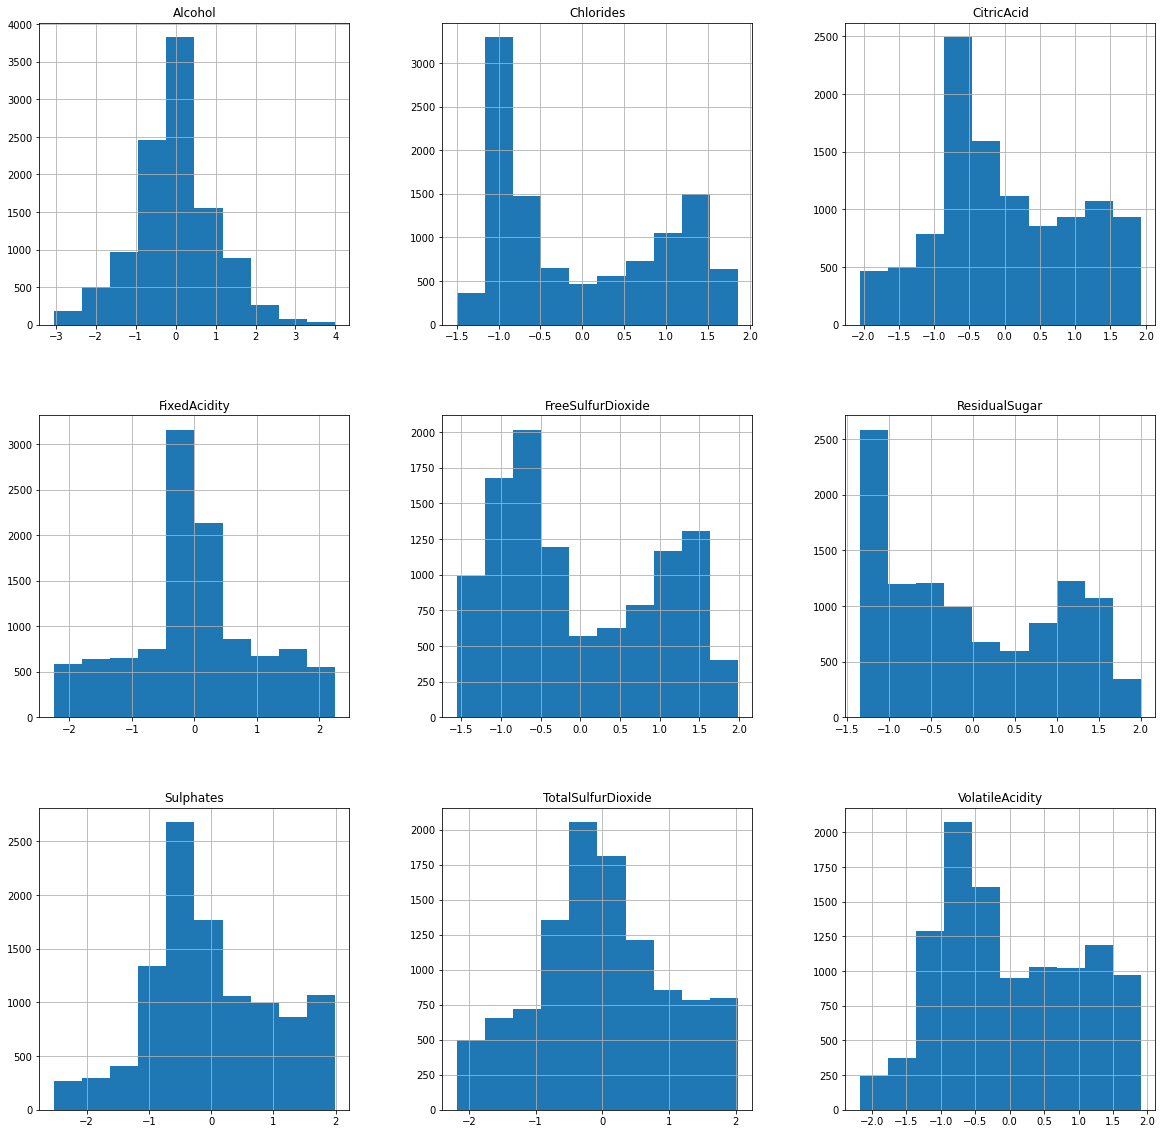

In [165]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))

power = PowerTransformer(method='box-cox')

pipeline = Pipeline(steps=[('s', scaler),
                           ('p', power)])

df_boxCox = pipeline.fit_transform(df_boxCox)
# convert the array back to a dataframe
df_boxCox = pd.DataFrame(df_boxCox)
# histograms of the variables
df_boxCox.columns = columns
df_boxCox.hist(figsize=(20,20))
pyplot.show()

In [35]:
df_dummy.head(5)

FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  Chlorides  \
0           3.2            1.160        0.98           54.2      0.567   
1           4.5            0.160        0.81           26.1      0.425   
2           7.1            2.640        0.88           14.8      0.037   
3           5.7            0.385        0.04           18.8      0.425   
4           8.0            0.330        1.26            9.4        NaN   

   FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  Alcohol  \
0                NaN               268.0  0.99280  3.33       0.59      9.9   
1               15.0               327.0  1.02792  3.38       0.70      NaN   
2              214.0               142.0  0.99518  3.12       0.48     22.0   
3               22.0               115.0  0.99640  2.24       1.83      6.2   
4              167.0               108.0  0.99457  3.12       1.77     13.7   

   LabelAppeal  rating_notreviewed  rating_poor  rating_good  rating_verygood  \
0            0                   0            0            1                0   
1            1                   0            0            0                1   
2            1                   0            0            0                1   
3            1                   0            1            0                0   
4            0                   0            0            1                0   

   rating_excellent  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

### Re-Run the EDA

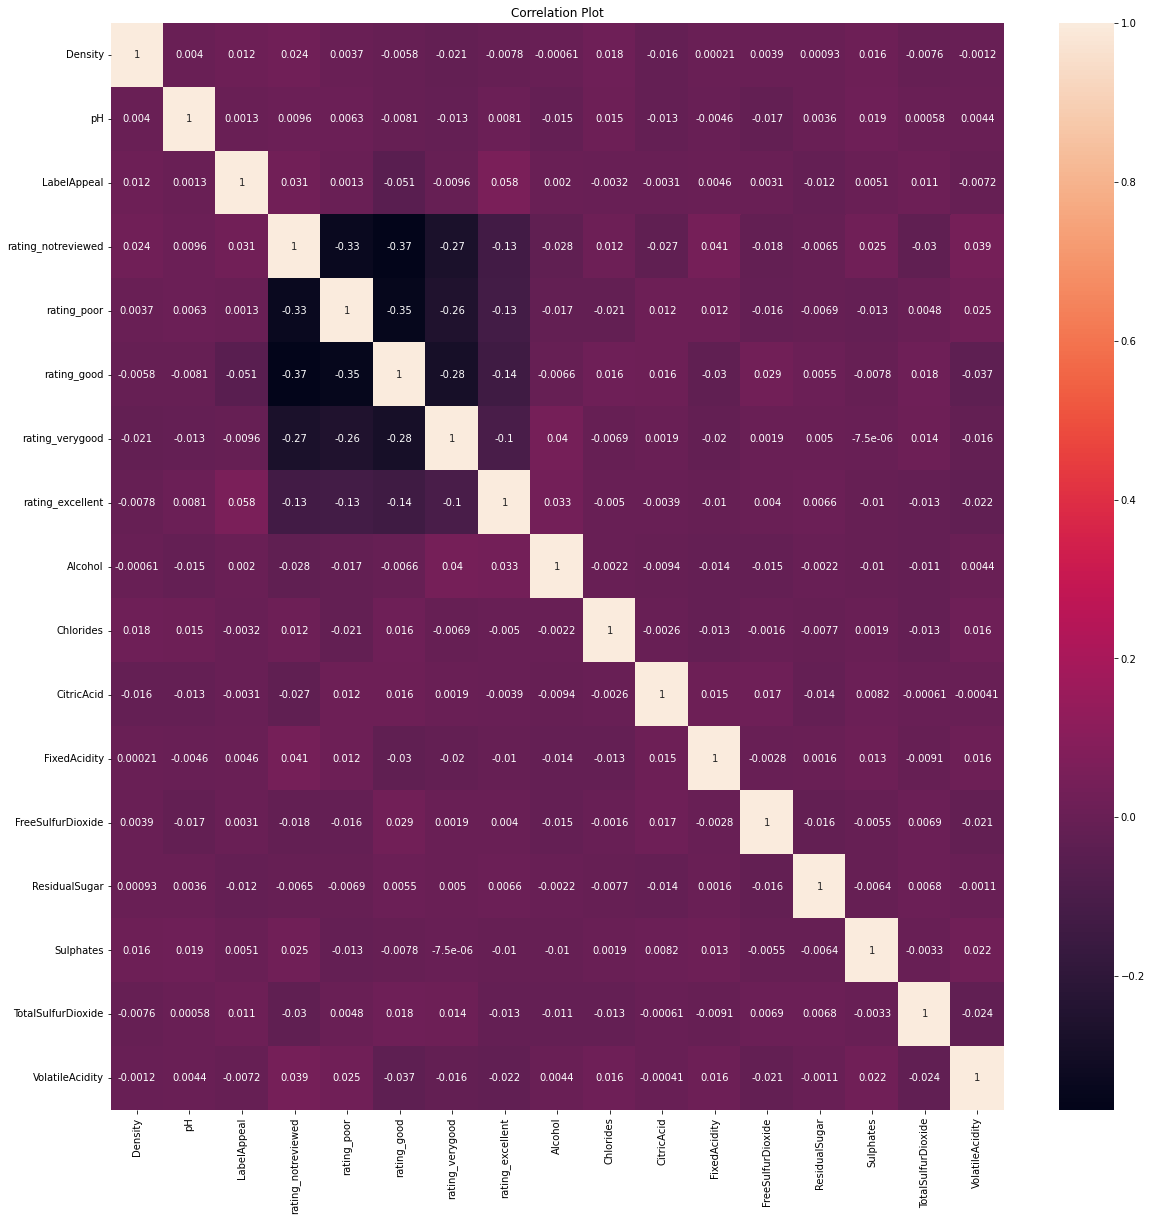

In [166]:
#looking at the correlations after the cleaning
# initial correlation
cor = df_dummy.iloc[:,1:].corr()
plt.figure(figsize=(20,20))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

we can see that the numeric variable correlations are still low.

In [167]:
#deleting the 2 lowest correlations
df_dummy.drop(columns=['pH','Density'], inplace=True)

### New data distributed in histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f858443b590>,
      dtype=object)

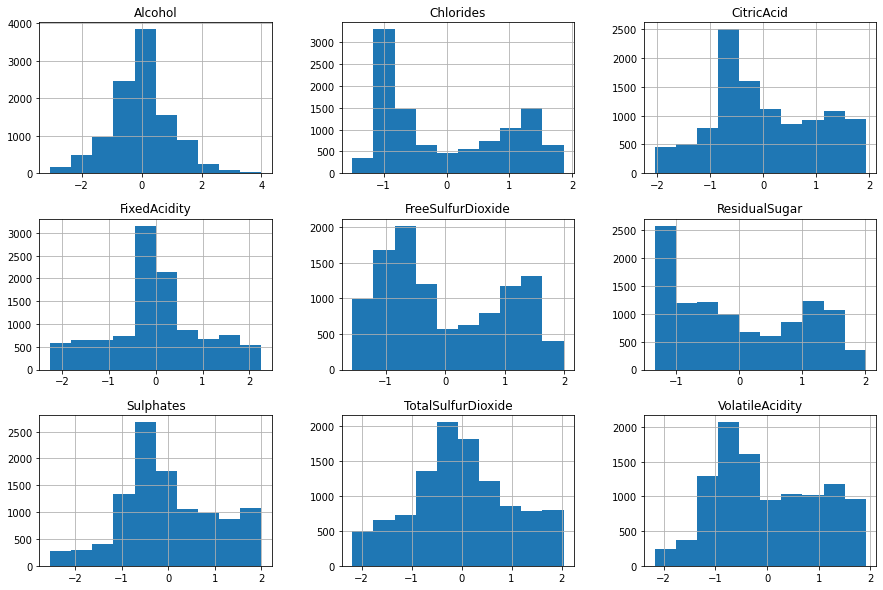

In [170]:
df_boxCox[columns].hist(figsize=(15,10))

### Old data distributed in histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8586002b50>,
      dtype=object)

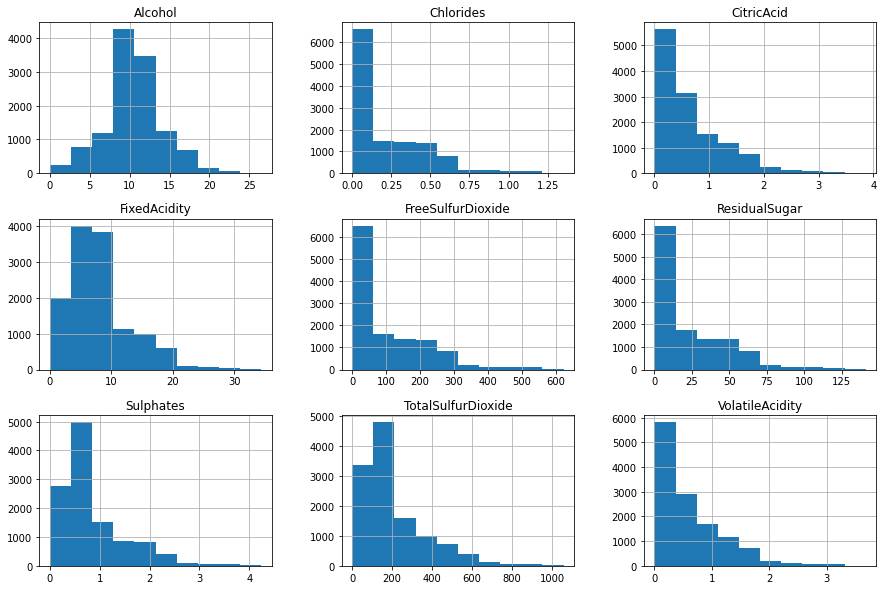

In [169]:
df[columns].hist(figsize=(15,10))

In [171]:
df_dummy[['rating_notreviewed', 'rating_poor', 'rating_good', 'rating_verygood', 'rating_excellent']].head()

rating_notreviewed  rating_poor  rating_good  rating_verygood  \
0                   0            0            1                0   
1                   0            0            0                1   
3                   0            1            0                0   
4                   0            0            1                0   
5                   1            0            0                0   

   rating_excellent  
0                 0  
1                 0  
3                 0  
4                 0  
5                 0

## Conclusion
I used the orginal data with more than 12,700 wine informations. There has 12795 row and 15 columns. I dropped the INDEX column because it was not necessary. And I change variable names. These are Target to Sold, and STARS to Rating, so I easy to read the data. Moreover, change the negative data to positive, and there has no duplicate.

When check the missing data, there has 8 values did not have data. Rating, Sulphates, alcohol, FreeSulfurDioxide, Chlorides, ResidualSugar,and pH have missing datas. Rating has missing datas more than others. 
I dropped the AcidIndex column because it is not good data information. 
And then use the graph to improve my data. Moreover, cleaning involved imputation and the removal of several columns which allowed to have a better understand of the nature of the dataset
